<img src="https://github.com/christopherhuntley/BUAN5405-docs/blob/master/Slides/img/Dolan.png?raw=true" width="180px" align="right">

# Lesson 12: Odds and Ends
_Tuples inside of lists inside of dictionaries ..._

# Learning Objectives

## Theory / Be able to explain ...
- How ReST API requests can be used to collect data from web services
- The tree structure of JSON data
- The purpose of the `date`, `datetime`, and `time` modules
- How datetime data can be used in pandas

## Skills / Know how to  ...
- Retrieve data from a ReST API or web URL.
- Parse JSON data using Python operators and functions
- Create and use time series data in DataFrames

**This is new content you won't find in the Py4E book. It is, however, somewhat related to the JSON materials in Chapter 13.**

## So long, farewell, auf Wiedersehen, good night
> This is the end, beautiful friend -- _The Doors_

Now that we have pandas in our quiver, it would seem like "what else do we need to know?" Quite a lot actually. DataFrames and Series bring together so many best practices that programmers have earned and learned over the past decades. However, pandas does not say much about the types of data we pour into our DataFrames. For that we will often need to pull in other libraries with even more data types, many of which build on top of pandas or numpy to make our lives that much better. We will briefly cover two such data types: JSON trees and Time Series. 

Except for your final project, with this lesson we have reached the end of the course. I hope you have gotten what you needed while you were here. It's been fun putting all this together for you and I hope to see you in person sometime soon. 

Now it's your turn. You know just enough Python to learn the rest. If you want to get better then keep your hands on the keyboards working on your own projects. If happen to be on our Slack, then try out the `#python-slashes` channel to post your best one-liners. I heard a rumour that there might even be a prize for the best one. 

## ReST APIs and JSON Data
In order to work with _really big data_ one usually has to gather it straight from the cloud. There is no concept of files, filenames, and filepaths in such an environment. Instead, we use **APIs** that provide **endpoints**, **query strings**, and ... **JSON data**. 

An Application Programming Interface (API) provides a standard set of functions (and perhaps a few configuration constants like security keys) for delivering a service. While there are APIs for lots of uses, the relevant ones for a data scientist are likely to be [ReST APIs](https://en.wikipedia.org/wiki/Representational_state_transfer). A ReST API uses the https protocol (i.e., the web) with specially-crafted request **endpoints** that tell the service what you want. Each endpoint combines a https command (GET, POST, PUT, PATCH, and DELETE) with a URL pattern indicating what data or other resource is being accessed. For example, the following ReST API call asks GitHub for details about this very notebook.  

In [1]:
import requests

raw_json = requests.get("https://api.github.com/repos/christopherhuntley/BUAN5405-lessons/commits?path=L12_Odds_Ends.ipynb")
raw_json.text

'[{"sha":"ce2df1273cbd6918729cc51bb7aeb1b9640d7ffd","node_id":"MDY6Q29tbWl0MjY5NzA5NTA2OmNlMmRmMTI3M2NiZDY5MTg3MjljYzUxYmI3YWViMWI5NjQwZDdmZmQ=","commit":{"author":{"name":"Christopher Huntley","email":"christopher.huntley@gmail.com","date":"2020-06-20T20:21:50Z"},"committer":{"name":"Christopher Huntley","email":"christopher.huntley@gmail.com","date":"2020-06-20T20:21:50Z"},"message":"Almost done with Lesson 12","tree":{"sha":"6dd90e59b1b198d0735c723bb196691e47cd4ee1","url":"https://api.github.com/repos/christopherhuntley/BUAN5405-lessons/git/trees/6dd90e59b1b198d0735c723bb196691e47cd4ee1"},"url":"https://api.github.com/repos/christopherhuntley/BUAN5405-lessons/git/commits/ce2df1273cbd6918729cc51bb7aeb1b9640d7ffd","comment_count":0,"verification":{"verified":false,"reason":"unsigned","signature":null,"payload":null}},"url":"https://api.github.com/repos/christopherhuntley/BUAN5405-lessons/commits/ce2df1273cbd6918729cc51bb7aeb1b9640d7ffd","html_url":"https://github.com/christopherhuntle


Lovely, isn't it? This is raw data in **JavaScript Object Notation (JSON)** format, which has become the lingua franca of data over the web. We can make it a little prettier using Python's built-in `json` library.

In [2]:
# raw_json was retrieved above.
import json 

github_data = json.loads(raw_json.text)  # convert to native Python objects
print(json.dumps(github_data, indent=4)) # pretty-print the JSON tree

[
    {
        "sha": "ce2df1273cbd6918729cc51bb7aeb1b9640d7ffd",
        "node_id": "MDY6Q29tbWl0MjY5NzA5NTA2OmNlMmRmMTI3M2NiZDY5MTg3MjljYzUxYmI3YWViMWI5NjQwZDdmZmQ=",
        "commit": {
            "author": {
                "name": "Christopher Huntley",
                "email": "christopher.huntley@gmail.com",
                "date": "2020-06-20T20:21:50Z"
            },
            "committer": {
                "name": "Christopher Huntley",
                "email": "christopher.huntley@gmail.com",
                "date": "2020-06-20T20:21:50Z"
            },
            "message": "Almost done with Lesson 12",
            "tree": {
                "sha": "6dd90e59b1b198d0735c723bb196691e47cd4ee1",
                "url": "https://api.github.com/repos/christopherhuntley/BUAN5405-lessons/git/trees/6dd90e59b1b198d0735c723bb196691e47cd4ee1"
            },
            "url": "https://api.github.com/repos/christopherhuntley/BUAN5405-lessons/git/commits/ce2df1273cbd6918729cc51bb7aeb1

While still not easy on the eyes, we can now at least start to make out the data structure. It looks to be a hierarchy (or **tree**) of **nested lists and dictionaries,** one inside another. In fact, that's exactly what it is. The `json` library's `loads()` function converted everything into native Python for us.  (Strangely, we had to convert it back to JSON using `dumps()` in order to pretty print it.)

Once we have the data in a Python-native tree format, it's pretty easy to traverse it to do things. We can refer to each **node** (item in the tree) using `[]` notation. We can determine a node's type of data (`list`, `dict`, `int`, `float`, `string`, `bytes`) using the `type()` or `instance_of()` functions. We can even select just the parts of the tree we want using slices. Though we won't do it here, we can even iterate through the tree searching for nodes of interest.

In [3]:
print("The root of the tree is a", type(github_data), "with",len(github_data), "items.") # ReST JSONs are always dicts or lists ...
print("The first branch is a", type(github_data[0]), "with",len(github_data), "items.")  # With nested dicts/lists inside; each list/dict is a branch of the tree
print("The commit message for the last commit was", github_data[0]['commit']['message']) # And the commit message is a leaf
print("The committer was \n",json.dumps(github_data[0]['committer'],indent=4))           # We can also take a cutting from the tree home with us.

The root of the tree is a <class 'list'> with 3 items.
The first branch is a <class 'dict'> with 3 items.
The commit message for the last commit was Almost done with Lesson 12
The committer was 
 {
    "login": "christopherhuntley",
    "id": 6188254,
    "node_id": "MDQ6VXNlcjYxODgyNTQ=",
    "avatar_url": "https://avatars1.githubusercontent.com/u/6188254?v=4",
    "gravatar_id": "",
    "url": "https://api.github.com/users/christopherhuntley",
    "html_url": "https://github.com/christopherhuntley",
    "followers_url": "https://api.github.com/users/christopherhuntley/followers",
    "following_url": "https://api.github.com/users/christopherhuntley/following{/other_user}",
    "gists_url": "https://api.github.com/users/christopherhuntley/gists{/gist_id}",
    "starred_url": "https://api.github.com/users/christopherhuntley/starred{/owner}{/repo}",
    "subscriptions_url": "https://api.github.com/users/christopherhuntley/subscriptions",
    "organizations_url": "https://api.github.com/

---
## Time Series
A **time series** is a data vector (pandas Series) **indexed by time** instead of by position. We can bundle several series together with a pandas DataFrame. First, we need to consider how Python handles time. 

### The `date`, `datetime`, and `time` modules
Standard library’s [`date`](https://docs.python.org/3/library/datetime.html#date-objects) and [`datetime`](https://docs.python.org/3/library/datetime.html#module-datetime) modules know all about creating and converting dates and times.

In [4]:
from datetime import date, datetime
print(date.today())             # today's date
print(datetime.now())           # the current time
print(datetime.now().weekday()) # the day of the week (Monday = 0)

2020-06-20
2020-06-20 17:06:22.567970
5


The standard `time` module handles time arithmetic, timezones, formatting, etc. Try not to get it confused with `datetime.time`.

Fun fact: Time is stored as a floating point number, the number of seconds since midnight of January 1, 1970.

In [5]:
import time
right_now = time.time() # the current time in seconds since midnight January 1, 1970
print(right_now, "\tseconds")
print(right_now/60, "\tminutes")
print(right_now/(60*60), "\thours")
print(right_now/(60*60*24), "\tdays")
print(right_now/(60*60*24*365.25), "\tyears")

1592687195.7804039 	seconds
26544786.596340064 	minutes
442413.1099390011 	hours
18433.879580791712 	days
50.46921172016896 	years


Neat, eh? However, **most of the time you probably want `datetime.time`**.

### pandas `DatetimeIndex` data type
pandas arrays (`Series` or `DataFrame`) can be indexed using timestamps instead of numbers or string labels. That makes slicing and dicing time pretty easy.

In [6]:
import pandas as pd
aapl_5d = pd.Series(
    [158.67,158.73,156.07,153.39,151.89],
    index=pd.date_range('2017-9-18',periods=5,freq='D'))
aapl_5d

2017-09-18    158.67
2017-09-19    158.73
2017-09-20    156.07
2017-09-21    153.39
2017-09-22    151.89
Freq: D, dtype: float64

Note that `pd.date_range()` works just like `range()` but with `datetimes` instead of integers. The data type of the index is `DatetimeIndex`.

In [7]:
type(aapl_5d.index)

pandas.core.indexes.datetimes.DatetimeIndex

Here's a more realistic time series with irregularly-spaced dates that uses pandas's `to_datetime()` function to ensure that the birthdates and inaugurated dates are interpreted correctly.

In [8]:
presidents = [ {'birthdate':pd.to_datetime('1732-02-22'),'name': "George Washington", 'inaugurated': pd.to_datetime('1789-04-30')},
               {'birthdate':pd.to_datetime('1735-10-30'),'name': "John Adams", 'inaugurated': pd.to_datetime('1797-03-04')},
               {'birthdate':pd.to_datetime('1743-04-13'),'name': "Thomas Jefferson", 'inaugurated': pd.to_datetime('1801-03-04')},
               {'birthdate':pd.to_datetime('1751-03-16'),'name': "James Madison", 'inaugurated': pd.to_datetime('1809-03-04')} ]
pres_df = pd.DataFrame.from_records(presidents, index='birthdate')
pres_df

,name,inaugurated
birthdate,,
1732-02-22,George Washington,1789-04-30
1735-10-30,John Adams,1797-03-04
1743-04-13,Thomas Jefferson,1801-03-04
1751-03-16,James Madison,1809-03-04


We can also, of course, index the time series after creating the DataFrame. 

In [9]:
pres_df = pd.DataFrame.from_records(presidents) # note no index column specified
pres_df.set_index('inaugurated', inplace=True)
pres_df

,birthdate,name
inaugurated,,
1789-04-30,1732-02-22,George Washington
1797-03-04,1735-10-30,John Adams
1801-03-04,1743-04-13,Thomas Jefferson
1809-03-04,1751-03-16,James Madison


## Reading Time Series from CSV Files
While pandas's I/O module often surprises us by guessing data types correctly the first time, there are a couple of settings you are likely to want to use when reading time series from CSV files like this one.  
```csv
name, birthdate,inaugurated
"George Washington",'1732-02-22','1789-04-30'
"John Adams",'1735-10-30','1797-03-04'
"Thomas Jefferson",'1743-04-13','1801-03-04'
"James Madison",'1751-03-16','1809-03-04'
```

In [10]:
pres_df = pd.read_csv("https://raw.githubusercontent.com/christopherhuntley/BUAN5405-lessons/master/presidents.csv", index_col=1,parse_dates=[1,2])
pres_df

,name,inaugurated
birthdate,,
1732-02-22,George Washington,1789-04-30
1735-10-30,John Adams,1797-03-04
1743-04-13,Thomas Jefferson,1801-03-04
1751-03-16,James Madison,1809-03-04


 - `index_col` setting is to force pandas to use `birthdate` as the index. In this case `birthdate` was in the second column.
 - `parse_dates` tells pandas to the indicated columns as dates before inserting into the DataFrame. 

### Time Slicing

`DatetimeIndex` is sliceable just like integer indexes. 

In [11]:
pres_df['1740-01-01':]

,name,inaugurated
birthdate,,
1743-04-13,Thomas Jefferson,1801-03-04
1751-03-16,James Madison,1809-03-04


### Easy Peasy Plots
The `plot()` method works just fine with `datetimes`, which are all just numbers after all. 

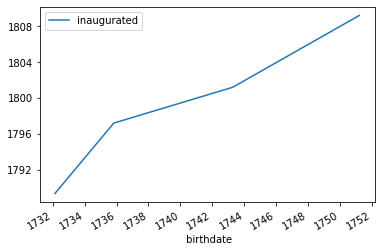

In [12]:
pres_df.plot()

---
## Exercises
**1. The code below retrieves a JSON tree with information about _Space Jam_, the 1996 Looney Tunes classic. Run the cell to make sure you have the most up-to-date copy of the `spacejam` data. Write your own code using the `spacejam` data to answer the following questions:**
- What was the film's budget?
- Is the movie a thriller?
- What character does Michael Jordan play?
- Who appeared uncredited?
- How many crew members were there?

For an extra challenge answer each of these questions by traversing the tree programmatically (with iteration or recursion) instead of using hardwired lookups like `spacejam[0]['cast'][0]`. 

In [13]:
import json
import requests

# spacejam.json is adapted from data downloaded from the TMDB api
spacejam = json.loads(requests.get("https://raw.githubusercontent.com/christopherhuntley/BUAN5405-lessons/master/spacejam.json").text)

In [ ]:
# YOUR CODE HERE

**2. Write a program to retrieve longitudinal [COVID-19 case data](https://colab.research.google.com/github/christopherhuntley/BUAN5405-lessons/blob/master/L12_Odds_Ends.ipynb) from CoronaTracker, identify the date with the highest count of new infections, and plot new infections over time.**

In [ ]:
# YOUR CODE HERE